Dependencies
=====
__All should be installable via ```pip```__
```nltk```
```matplotlib```
```wordcloud```
```sklearn```
```pandas```
```numpy```
```scipy```
```gensim```
```pyldavis```

Introduction to Natural Language Processing
===
## Dan Acheson
## 4/28/2016
## Do Good Data 2016

> Email:  
> - dan@timshel.com

> Twitter:
> - @DataScience_Dan
> - @timshel

---
Dependencies
===============
### Python 2.X
### Libraries (downloadable via pip)

1 | 2
--- | ---
`pandas` | `scipy`
`numpy` | `matplotlib`
`nltk` | `gensim`
`wordcloud` | `sklearn`
`pyldavis` | 

---
Natural Language Processing 
===============
- Techniques, tools and algorithms that allow for computational approaches to language processing
- Historically comes from the combination of a number of fields
  - Computer science
  - Computational linguistics
  - Artificial Intelligence
  - Psychology

---
### Typical NLP Workflow

<div align="center", position = "center">
<img src="./pres_data/images/NLP_Flow.png" width = 500>
</div>

---
### Terminology
- __Natural language:__ language produced by humans
- __Text__: the writen form of language
- __String__: computer representation of text (a.k.a., character) 
- __Document__: a bunch of text that comes from the same place
    - Can be as large as a whole book, or as small as a single tweet
- __Corpus__: A collection of documents (plural: _corpora_)


---
Data Sources for Text
================
1. APIs from the services you love
  - [Twitter API](https://dev.twitter.com/overview/documentation) is particularly is useful
2. Web-scraping
3. PDFs / printed text
    - Need optical character recognition (OCR)
4. Digitized collections of books, newspapers, etc.
  - [Project Gutenberg](https://www.gutenberg.org/)
  - [New York Times](http://www.nytimes.com/ref/membercenter/nytarchive.html)
5. Curated corpora by NLP researchers
6. [Wikipedia!](http://https://dumps.wikimedia.org/)
    - Can Get full wikipedia dump in multiple languages.


---
Text Wrangling 101
==========
- Very important skills to learn if you're going to work with text
- Python's base string class has much of what you'll need
- Otherwise, the ```re``` module will cover you for regular expressions

## Typical Processing Operations
- making text __```lower```__ or __```UPPER```__ case
- __`splitting`__ text on a delimiter
- __```substituting```__ one string for another
- __```searching```__ for or __```extracting```__ strings
- __```trimming```__ text to remove leading a trailing whitespace
- performing the above operations on a list of strings

---
### Lower and upper case

In [4]:
myText = "Do Good Data 2016"
print myText.lower()
print myText.upper()

do good data 2016
DO GOOD DATA 2016


---
### String splitting on a delimiter

In [5]:
# Comma-separated text
myText = "Comma,separated,text"
myText.split(",")

['Comma', 'separated', 'text']

In [6]:
# Splitting an email address
myText = "dan@timshel.com"
myText.split("@")

['dan', 'timshel.com']

---
### Splitting each element of a list

In [10]:
list_of_emails = ["fred@flinstones.com", "wilma@flinstones.com","pebbles@flinstones.com"]
# Here using list comprehension
first_names = [txt.split('@')[0] for txt in list_of_emails]
print first_names
last_names = [txt.split('@')[1] for txt in list_of_emails]
print last_names

['fred', 'wilma', 'pebbles']
['flinstones.com', 'flinstones.com', 'flinstones.com']


---
### Concatenating / joining text

In [11]:
split_text = ["My", "text", "in", "a", "vector / list"]
print split_text
",".join(split_text)

['My', 'text', 'in', 'a', 'vector / list']


'My,text,in,a,vector / list'

---
### Stripping / trimming leading or trailing whitespace

In [229]:
myText = "  Space at beginning removed"
print "Before: " + myText
myText = myText.strip()
print "After: " + myText
print "\n" + "-"*20
myText = "Text with carriage return and newlines removed\r\n"
print "Before: " + myText
myText = myText.strip()
print "After: " + myText

Before:   Space at beginning removed
After: Space at beginning removed

--------------------
Before: Text with carriage return and newlines removed

After: Text with carriage return and newlines removed


---
## Regular Expressions

- Regular Expressions (i.e., regexes) are simple yet powerful language for finding patterns in text
- If you don't know 'em, go out and learn 'em. 
- You'll find tons of applications and seriously increase your ability to search, munge and manipulate text.
- In Python you'll be using the [__re__](https://docs.python.org/2/library/re.html) module

### Regular Expression Syntax:
Syntax | Example
------ | -------
`[ ]` set membership <br><br> | `[A-Za-z]` = all letters <br><br>
`[^ ]` set exclusion <br><br> | `[^0-9]` = exclude numbers <br><br>
`*` repeat pattern 0 or more times <br><br> | `[a-z]*` = lowercase repeat 1+<br><br>
`+` repeat pattern 1 or more times <br><br> | `ab+` = "ab" repeated 0+ times<br><br>
`{1,3}` repeats between 1-3X <br><br> | `[a-z]{1,3}` = lowercase letters 1-3X<br><br>
`\` escape character to ignore regex syntax (`\\` in R) | `\\.com` = treat   " . "   like a period
`.` anything once | `b.b` matches "bob", "bub" but not "barb"
`.*` anything repeated (greedy) <br>**Be Careful!**  `.*?` is non-greedy | `b\.*b` matches anything beginning and ending with "b"
`^` begins with | `^[A-Z]` = begins with capital letter
`$` ends with | `.*ing$` = anything ending with "ing"



---
## Wrangling Continued
---
### Substituting / replacing text
#### e.g., Getting rid of numbers

In [4]:
import re
myText = "Text with 9879numbers 54 I do43n't wan234t"
re.sub("[0-9]+","", myText)

"Text with numbers  I don't want"

---
### Extracting Text

In [5]:
myText = "Address 1: dan@timshel.com, Address 2: barney_rubble@flinstones.com"
## This code intentionally has a mistake in it. Can you spot it?
re.findall("[a-zA-Z0-9_]+@.*.[a-zA-Z]+", myText)

['dan@timshel.com, Address 2: barney_rubble@flinstones.com']

---
### Extracting Email - Correct
- The code above didn't work
- Remember __```.*```__ is _greedy_, so be careful!
- Here using __```.*?```__ and escaping the . with __```\.```__

In [6]:
myText = "Address 1: dan@timshel.com, Address 2: barney_rubble@flinstones.com"
re.findall("[a-zA-Z0-9_]+@.*?\.[a-zA-Z]+", myText)

['dan@timshel.com', 'barney_rubble@flinstones.com']

---
### Extracting HTML content

In [7]:
html = open("./pres_data/example.html").read()
print html
regex = "<li>(.*?)</li>"
re.findall(regex, html)

<ol>
   <li>Lorem ipsum dolor sit amet, consectetuer adipiscing elit.</li>
   <li>Aliquam tincidunt mauris eu risus.</li>
   <li>Vestibulum auctor dapibus neque.</li>
</ol>




['Lorem ipsum dolor sit amet, consectetuer adipiscing elit.',
 'Aliquam tincidunt mauris eu risus.',
 'Vestibulum auctor dapibus neque.']

---
Word Frequencies
====
__Why focus so much attention on them?__
- Forms of the basis of text processing we'll see later
- Gives you the tools to customize!
- Can quickly get to word frequencies, which can be VERY informative
<br>
<br>
- Let's look at frequencies from 'Alice in Wonderland'
- Data comes from [Project Gutenberg](https://www.gutenberg.org/)

### Read in the Data

In [8]:
alice = open("./pres_data/alice.txt").read()

#Simple pre-processing
def pre_process(txt): 
  txt = txt.lower()
  txt = re.sub("\n", " ", txt) #newline with space
  txt = re.sub("[ ]{2,}", " ", txt) #extra spaces
  txt = re.sub("[^a-zA-Z ]","", txt) #only keep letters
  return(txt)

alice = pre_process(alice)
alice[0:100]

'alices adventures in wonderland lewis carroll the millennium fulcrum edition  chapter i down the rab'

### Get frequencies

In [9]:
# Get frequencies using Counter
from collections import Counter
#put alice into a list
words = alice.split(' ')
freqs = Counter(words)
freqs.most_common(8)

[('the', 1631),
 ('and', 844),
 ('to', 721),
 ('a', 627),
 ('she', 537),
 ('it', 526),
 ('of', 508),
 ('said', 462)]

### What do you notice?
These very common words are called _stopwords_. When focusing on individual words, these are often removed as they don't carry much information.

---
Visualizing Word Frequencies with Word Clouds
===
Here using the [wordcloud](href=https://github.com/amueller/word_cloud) library

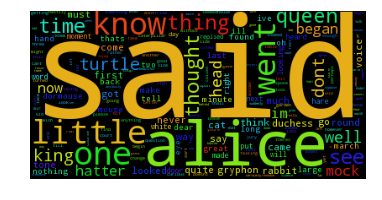

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(max_words=2000)
wc.generate(alice)
plt.imshow(wc)
plt.axis("off")
plt.show()

- The default above is to remove stopwords
- Let's get rid of the word 'said,' too

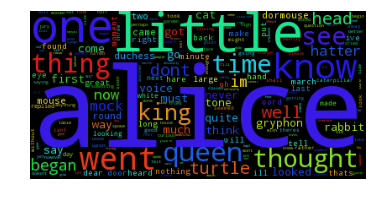

In [14]:
wc = WordCloud(max_words=2000, stopwords = STOPWORDS.add('said')).generate(alice)
plt.imshow(wc)
plt.axis("off")
plt.show()

---
The Vector Space / N-Gram Model
======
**Representing documents as vectors**
## Pre-processing text for vector space model
**Pre-processing depends on what you're doing. But generally:**
1. Remove punctuation
2. [Tokenization](https://en.wikipedia.org/wiki/Tokenization_(lexical_analysis\)
3. Remove stop-words (e.g., "a", "the", etc.)
4. Lowercase
5. Remove low-frequency words
6. [Stemming](https://en.wikipedia.org/wiki/Stemming)


### Tokenization
**How you break up your text into meaningful units for analysis**
<br>
- Could be individual words
  - Unigram / bag of words representation

- Could be pairs or triples of words
  - bigram / trigram

- Could be sentences, paragraphs, etc.


### Word stemming
- Treat similar forms of a word:
_run_, _runs_, _running_, _runner_?

- As the same word:
_run_

Reasons for doing it | Reasons to not do it
---|---
Reduce vocabulary size | Lose information
Increase similarity across texts | 

#### Main Types

1. Remove suffixes from words
_run_, _runs_, _running_, _runner_ -> run

    - Common algorithms:
        - Porter, Snowball, Lancaster, regexp

2. Lemmatization
    - Use syntactic analysis to remove inflectional (i.e., sytnactic) endings
    - _am_, _is_, _are_ -> be


In [17]:
import re
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer

txt  = ["The cow jumped over the moon.", "The cows ate grass"]

def clean(text):
    #lowercase
    text = text.lower()
    #regex to keep only words or spaces
    text = re.sub(r'[^\w\s]','',text)
    #Alternate: remove punctuation using string translate
    #text.translate(None, string.punctuation) 
    return text

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

txt_clean = [clean(text) for text in txt]
print "Cleaned text:"
print txt_clean

Cleaned text:
['the cow jumped over the moon', 'the cows ate grass']


### Get word frequencies using scikitlearn's CountVectorizer

In [18]:
count_vect = CountVectorizer(tokenizer=tokenize, stop_words='english')
dfm = count_vect.fit_transform(txt_clean)

print "Word -- Sent1 -- Sent2"
feature_names = count_vect.get_feature_names()
for col in dfm.nonzero()[1][0:10]:
    print "%s -- %s -- %s" % (feature_names[col], dfm[0, col], dfm[1, col])

Word -- Sent1 -- Sent2
cow -- 1 -- 1
jump -- 1 -- 0
moon -- 1 -- 0
cow -- 1 -- 1
ate -- 0 -- 1
grass -- 0 -- 1


---
## From unigrams to n-grams
- So far what we've done is a unigram, or bag-of-words model
- Can also incorporate bigrams

In [19]:
count_vect = CountVectorizer(ngram_range=(1, 2),
                             tokenizer=tokenize, 
                             stop_words='english')
dfm = count_vect.fit_transform(txt_clean)
feature_names = count_vect.get_feature_names()
print "Word -- Sent1 -- Sent2"
feature_names = count_vect.get_feature_names()
for col in dfm.nonzero()[1][0:10]:
    print "%s -- %s -- %s" % (feature_names[col], dfm[0, col], dfm[1, col])

Word -- Sent1 -- Sent2
cow -- 1 -- 1
jump -- 1 -- 0
moon -- 1 -- 0
cow jump -- 1 -- 0
jump moon -- 1 -- 0
cow -- 1 -- 1
ate -- 0 -- 1
grass -- 0 -- 1
cow ate -- 0 -- 1
ate grass -- 0 -- 1


---
## Normalizing to deal with text of different lenghts

In [42]:
# Combining a single sentence with all of Alice in Wonderland
txt  = ["The cow jumped over the moon.", alice]
txt_clean = [clean(text) for text in txt]

count_vect = CountVectorizer(tokenizer=tokenize, 
                             stop_words='english')
dfm = count_vect.fit_transform(txt_clean)

print "Word -- Sentence -- Alice"
feature_names = count_vect.get_feature_names()
for col in dfm.nonzero()[1][0:10]:
    print "%s -- %s -- %s" % (feature_names[col], dfm[0, col], dfm[1, col])

Word -- Sentence -- Alice
cow -- 1 -- 0
jump -- 1 -- 10
moon -- 1 -- 1
jump -- 1 -- 10
moon -- 1 -- 1
alic -- 0 -- 397
adventur -- 0 -- 6
wonderland -- 0 -- 3
lewi -- 0 -- 1
carrol -- 0 -- 1


### Normalize by word maximum for each row

In [43]:
import numpy
dfm2 = dfm.copy()
dfm2 = dfm2.astype(float)
for row in range(dfm2.shape[0]):
    dfm2[row] = dfm2[row] / dfm2[row].max()

print "Word -- Sentence -- Alice"
feature_names = count_vect.get_feature_names()
for col in dfm.nonzero()[1][0:10]:
    print "%s -- %.2f -- %.2f" % (feature_names[col], dfm2[0, col], dfm2[1, col])


Word -- Sentence -- Alice
cow -- 1.00 -- 0.00
jump -- 1.00 -- 0.02
moon -- 1.00 -- 0.00
jump -- 1.00 -- 0.02
moon -- 1.00 -- 0.00
alic -- 0.00 -- 0.86
adventur -- 0.00 -- 0.01
wonderland -- 0.00 -- 0.01
lewi -- 0.00 -- 0.00
carrol -- 0.00 -- 0.00


---
## Term Frequency Inverse Document Frequency (TFIDF)
**A go-to approach for many NLP tasks**
1. Normalize by frequency within each document (i.e., by row)
2. Normalize by _inverse_ frequency across documents (i.e., by column)
  - ```-log(1 / (# of docs term appears in))```
  
### Some insight into what's going on
__The effect of TFIDF is to emphasize words that frequent within a document, and infrequent across documents__
<div align="center", position = "center">
<img src="./pres_data/images/Term_Frequency.png" width = 500>
</div>

<div align="center", position = "center">
<img src="./pres_data/images/TFIDF.png" width = 500>
</div>

### TFIDF using scikitlearn's TfidfVectorizer

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

txt  = ["The cow jumped over the moon.", alice]
#clean and tokenize as before
txt_clean = [clean(text) for text in txt]
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(txt_clean)
#print tfs

print "Word -- Sent1 -- Sent2"
feature_names = count_vect.get_feature_names()
for col in dfm.nonzero()[1][0:10]:
    print "%s -- %0.2f -- %0.2f" % (feature_names[col], tfs[0, col], tfs[1, col])

Word -- Sent1 -- Sent2
cow -- 0.70 -- 0.00
jump -- 0.50 -- 0.01
moon -- 0.50 -- 0.00
jump -- 0.50 -- 0.01
moon -- 0.50 -- 0.00
alic -- 0.00 -- 0.44
adventur -- 0.00 -- 0.01
wonderland -- 0.00 -- 0.00
lewi -- 0.00 -- 0.00
carrol -- 0.00 -- 0.00


---
Machine Learning with Text
========
**After all the vectorizing, we end up with a matrix of features to use for many different tasks:**

- __Unsupervised learning:__
    * clustering
    * document similarity
    * semantic analysis
- __Supervised learning:__
    * sentiment analysis
    * document classification / tagging
- __Information retrieval__


---
# Clustering / Document Similarity
__Answers the question:__ Which of our documents group together based the language they contain?

Basic Procedure:

1. Clean and vectorize text
2. Create a distance / similarity matrix (not always)
3. Cluster

---
## Clustering Example: Tweets about sustainable development
**The data:**
Downloaded from the Twitter search API looking for _"sustainable development"_ and _"SDG"_

**The Question:**
What are the conversations going on around sustainable development?

In [46]:
import pandas as pd

tweets = pd.read_csv("./pres_data/twitter_dat.csv")
print tweets['text'][0]
print "Original Shape: " + str(tweets.shape)

#Let's remove retweets
tweets = tweets[~tweets['text'].str.contains("RT ")]
print "Without Retweets: " + str(tweets.shape)

RT @CUBAONU: #CPD49 #Cuba proves that sustainable development can be reached  w/ political will https://t.co/fatAie4Gyr #UNPopulation
Original Shape: (20062, 2)
Without Retweets: (8771, 2)


### The ```clean tweets``` function below is a modification from [this blogpost]("https://sites.google.com/site/miningtwitter/questions/sentiment/viralheat")

In [47]:
def clean_tweets(txt):
    # Args:
    #  txt: character vector of text from twitter
    # Returns:
    # txt:  cleaned character vector of text
  
    # remove retweet entities
    txt = re.sub("(RT|via)((?:\\b\\W*@\\w+)+)", "", txt)
    # remove at people
    txt = re.sub("@\\w+", "", txt)
    # remove html links
    txt = re.sub("http\\S+", " ", txt)
    # remove punctuation
    txt = re.sub(r"[^\w\s]", " ", txt)
    # remove numbers
    txt = re.sub("[0-9]+", " ", txt)
    # remove unnecessary spaces
    txt = re.sub("[ \t]{2,}", " ", txt)
    txt = txt.strip()
    # remove single character words remaining
    txt = re.sub(" [a-zA-Z] "," ", txt)
  
    txt = txt.lower()
    return txt

#Add a column for cleaned tweets
tweets['text_clean'] = [clean_tweets(text) for text in tweets['text']]
#Uncleaned
print "Uncleaned: " + tweets.iloc[0]['text']
print "\n" + "-"*20
#Cleaned
print "Cleaned: " + tweets.iloc[0]['text_clean']

Uncleaned: #CPD49 #Cuba proves that sustainable development can be reached  w/ political will https://t.co/fatAie4Gyr #UNPopulation

--------------------
Cleaned: cpd cuba proves that sustainable development can be reached political will unpopulation


### Vectorizing for clustering
- Choice of how you vectorize will depend on the simililarity metric you use
    - frequency or tfidf coded  
    - binary coding

- Some choices during pre-processing:
    - stem?
    - removed words
    - frequency cutoffs

In [48]:
## Here, use TFIDF as before
import sklearn
from sklearn.feature_extraction import text

#add some custom stopwords
sdg_words = ['sustainable', 'development', 'goals']
stop_words = text.ENGLISH_STOP_WORDS.union(sdg_words)

tfidf = TfidfVectorizer(tokenizer=tokenize, 
                        stop_words=stop_words,
                       min_df = 40)

tfs = tfidf.fit_transform(tweets['text_clean'])
tfs.shape

(8771, 276)

### Calculate distance / similarity
- Many different ways of calculating distance / similarity:
    - Euclidean
    - Jaccard
    - Cosine



- Distance calculations can take a while depending on the size of the matrix.
- Solutions:
    - Reduce the size of the matrix
    - Consider trying to parallelize



- The [sklearn.metrics.pairwise](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise) is a good place to start to see what's possible


- Below we use Cosine Similarity

---
## Hierarchical Agglomerative Clustering
- Here using [scipy.cluster.hierarchy](http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)
    - Slower than [sklearn.cluster.AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering), but allows for easier plotting
    - Check out [this tutorial](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/) for a nice walkthrough
    

### Calculate Distance Matrix

In [49]:

from sklearn.metrics.pairwise import cosine_similarity

#Calculate distance matrix on a subset of the tweets
sim_mat = cosine_similarity(tfs[0:3000])
#Matrix is now tweet to tweet similarity
sim_mat.shape


(3000, 3000)

### Hierarchical Agglomerative Clusering using ward linkage

In [51]:
from scipy.cluster.hierarchy import ward

#this will take a moment
hclust = ward(sim_mat)

### Plotting cluster dendrogram
Part of the reason for plotting this is to look for how things are grouping together
- This should give you insight into how many clusters you might try to extract or where you might make cuts

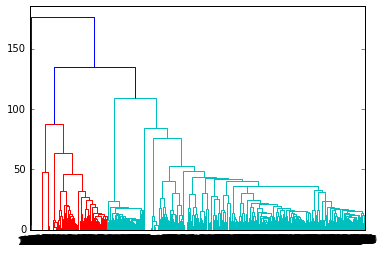

In [336]:
from scipy.cluster.hierarchy import dendrogram
dendr = dendrogram(hclust)


### Plotting groups as wordclouds
__Steps:__
1. Assign docments to a group by cutting the tree
2. Look at wordclouds for each group

#### Assign Documents to groups

In [429]:
from scipy.cluster.hierarchy import fcluster
groups = fcluster(hclust, 20, criterion='maxclust')

#### Plot wordclouds

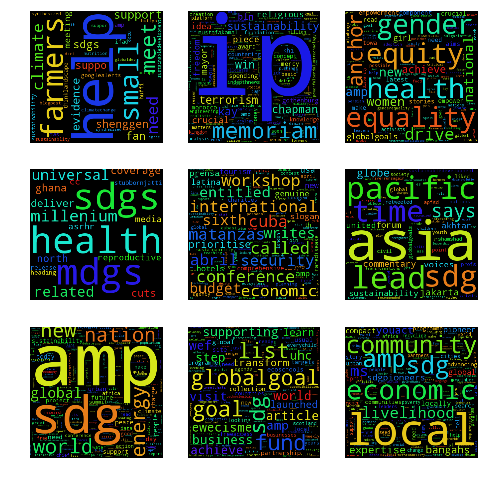

In [53]:
def get_wordcloud_group(df, text_var, group_var, group_num, exclude_words):
    # Function to create wordcloud of text from a grouping column
    #    Uses the WordCloud from the wordcloud library
    # Args:
    #   df: pandas data frame
    #   text_var: string, variable name with text
    #   group_var: string, column name for grouping variable
    #   group_num: int, group number to plot
    #   exclude_words: list, words to exclude for plotting
    
    #subset data frame according to group_num and get all the text
    df_sub = df[df[group_var]==group_num]
    all_text = " ".join(df_sub[text_var])        
    #print len(all_text)
    wc = WordCloud(stopwords = exclude_words, width = 400, height = 400).generate(all_text)
    return wc

#Get subset of the tweets that we used above for clustering
tweets_sub = tweets[0:3000].copy()
#Assign tweets to groups
tweets_sub['group'] = groups

#Words to exclude from plotting
exclude_words = text.ENGLISH_STOP_WORDS.union(sdg_words)

group = 1
plt.figure(figsize=(8,8))
for i in range(3):
    for j in range(3):
        wc = get_wordcloud_group(tweets_sub, 'text_clean', 'group', group_num = group, exclude_words = exclude_words)
        plt.subplot(3,3, group)
        plt.imshow(wc)
        plt.axis("off")
        group += 1
plt.show()

---
## KMeans Clustering

- One advantage of using KMeans: No similarity matrix needed!
- Still need to think about:
    - preprocessing
    - choice of K
    - visualizing
    
    
### Perform clustering

In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20)
kmeans.fit(tfs[0:3000])

#Get the groups
groups = kmeans.labels_
groups = [group+1 for group in groups]

### Plot with wordclouds

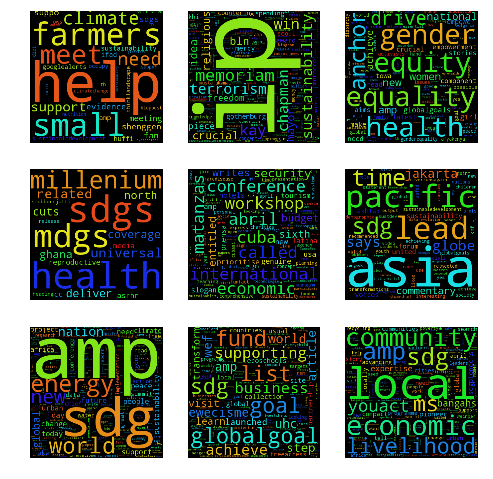

In [54]:
#Get subset of the tweets that we used above for clustering
tweets_sub = tweets[0:3000].copy()
#Assign tweets to groups
tweets_sub['group'] = groups

#Words to exclude from plotting
exclude_words = text.ENGLISH_STOP_WORDS.union(sdg_words)

group = 1
plt.figure(figsize=(8,8))
for i in range(3):
    for j in range(3):
        wc = get_wordcloud_group(tweets_sub, 'text_clean', 'group', group_num = group, exclude_words = exclude_words)
        plt.subplot(3,3, group)
        plt.imshow(wc)
        plt.axis("off")
        group += 1
plt.show()

---
## Semantic Analysis through topic modeling
__Answers the question:__ What is the underlying meaning captured in different documents?

- [Topic modeling](https://en.wikipedia.org/wiki/Topic_model) is a statistical approach to natural language processing that find patterns in documents where words within the document can be assigned to abstract 'topics'
- A document about sports is likely to have a different distribution of words than a document about cooking
- Check out material from [David Blei](https://www.cs.princeton.edu/~blei/topicmodeling.html) for good intros

### Approaches to topic modeling

**[Latent Semantic Indexing (LSI) / Latent Semantic Analysis (LSA)](https://en.wikipedia.org/wiki/Latent_semantic_indexing)**
- uses singular value decomposition (SVD) over a document-term matrix
- equivalent to multivariate principle components analysis (PCA)

**[Latent Dirichlet Allocation (LDA)](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)**
- a generative (i.e, probabilistic) framework for estimating topics 
- assumes each document is a mixture of topics defined by the words in the document
- most commonly used today


### Latent Dirichlet Allocation (LDA)
#### Algorithm
- Initialization
    - Choose the number of topics 
    - Randomly assign topics to words within a document according to a dirichlet distribution
    - Gives you distributio of words over topics and distribution of topics over documents
  
- Learning - iteratively repeat the following:
  For each document calculate:
    - Probabality of each topic given the words in the document
    - For each word, the probability of the different topics based on the topic assignment of that word in the other documents

---

#### Text pre-processing for LDA
- LDA works off of raw term frequencies. So, tfidf is out here.

- Preprocessing:
    - lowercase, punctuation and stop-word removal
    - tokenization
    - stemming
    - Removing low frequency words
        - document occurence
        - using tfidf cutoff

---

## LDA over DoGoodData session descriptions
- Let's have some fun with DoGoodData's data!
- Data is a webscrape of the session description
- This is a toy example, and is __not__ the right data for topic modeling
    - there aren't enough documents
    - text is sometimes not very long
  
  
- All that being said...today we'll use the [__`gensim`__](https://radimrehurek.com/gensim/) library
    - __gensim__ is a super fast library for lots of things, including vectorizing text, finding similar documents, and much more. 


In [60]:
import string
import os
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess

#Simple tokenizer taking advantage of gensim's simple_preprocess
def tokenize(text):
    text = text.translate(None, string.punctuation) 
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

# Generator to create a text corpus from a list of input files
class MyCorpus(gensim.corpora.TextCorpus): 
    def get_texts(self): 
        for filename in self.input: # for each relevant file 
            yield tokenize(open(filename).read())

dgd_files = os.listdir("./pres_data/DoGoodData_sessions/")
#add root and only include txt files
dgd_files = ["./pres_data/DoGoodData_sessions/" + x for x in dgd_files if ".txt" in x]

#Read files into a corpus
dgd_corpus = MyCorpus(dgd_files)

#Create a dictionary to keep track of words
#  This could later be used to filter either very frequent or infrequent words
#  E.g., dgd_dictionary.filter_extremes(no_below=20, no_above=0.1)

dgd_dictionary = dgd_corpus.dictionary


#Peform LDA with 10 topics
dgd_lda10 = gensim.models.LdaModel(dgd_corpus, 
                                   num_topics=10, 
                                   id2word= dgd_dictionary,
                                   passes=4)


### Display the top 5 words for the topics

In [56]:
dgd_lda10.show_topics(num_words=5, log=False, formatted=False)

[[(0.055235937645534743, u'data'),
  (0.01086442909604104, u'use'),
  (0.0082221127503520029, u'session'),
  (0.0073784973522758052, u'organization'),
  (0.0070018909870263532, u'participants')],
 [(0.012092766600798395, u'fundraising'),
  (0.010057601429141041, u'spatial'),
  (0.0082156898448264726, u'analysis'),
  (0.0081394324075984084, u'disease'),
  (0.0081116601693463786, u'cause')],
 [(0.042916527883788476, u'data'),
  (0.0083842350595962779, u'll'),
  (0.0082018578126642813, u'social'),
  (0.008086488754818235, u'time'),
  (0.0077197258859340008, u'use')],
 [(0.034912673034545205, u'data'),
  (0.011416174188864418, u'tools'),
  (0.010219687792495991, u'open'),
  (0.0097723269704974979, u'stories'),
  (0.0080866423485535452, u'session')],
 [(0.04243218541739039, u'data'),
  (0.0074119663989074937, u'water'),
  (0.006008102936178779, u'cara'),
  (0.0059677070908431273, u'program'),
  (0.0059496230891992541, u'impact')],
 [(0.035800844463089114, u'data'),
  (0.0081370234942143311,

### "Improving" our LDA
- Lots of repeated terms across topics
- Definitely too many topics given our corpus size


- __NOTE:__ It might not be a good idea to remove terms as below. These represent real aspects of the topics in a corpus.
- It's done here to illustrate the differerences between topics

In [61]:
import copy 
from gensim.models import VocabTransform

#Copy and filter the original dictionary
dgd_dictionary2 = copy.deepcopy(dgd_dictionary)
dgd_dictionary2.filter_extremes(no_above=0.5)
dgd_dictionary.compactify()

#Modify previous corpus to remove the words from above
# see Q8 here for recipe: https://github.com/piskvorky/gensim/wiki/Recipes-&-FAQ
old2new = {dgd_dictionary.token2id[token]:new_id for new_id, token in dgd_dictionary2.iteritems()}
vt = VocabTransform(old2new)
dgd_corpus2 = vt[dgd_corpus]

#LDA with 4 topics
dgd_lda4 = gensim.models.LdaModel(dgd_corpus2, 
                                  num_topics=4, 
                                  id2word=dgd_dictionary2, 
                                  passes=4)

dgd_lda4.show_topics(num_words=5, log=False, formatted=False)


[[(0.019891902738984075, u'tools'),
  (0.017262224800085144, u'session'),
  (0.016443517601952711, u'learning'),
  (0.014853366370746024, u'learn'),
  (0.014777148671362574, u'use')],
 [(0.024560698120401906, u'discuss'),
  (0.022446318649151208, u'change'),
  (0.021975421258330758, u'learning'),
  (0.020561327655761626, u'use'),
  (0.019961339284603377, u'community')],
 [(0.026203634749672432, u'use'),
  (0.024750137303128826, u'information'),
  (0.022419189654455059, u'sector'),
  (0.018134497886293215, u'organization'),
  (0.017966916016478433, u'learn')],
 [(0.030146672211570087, u'program'),
  (0.02897744469500238, u'impact'),
  (0.022376149124401057, u'session'),
  (0.021536662060800682, u'analysis'),
  (0.020078951298397287, u'organizations')]]

---
## Visualizing Topic Models
### Wordclouds
- Wordclouds here came from topic models run on nonprofit mission statements located in their 990 tax forms
- Words are top X words for a topic, Size correspond to the weight.

<tr>
<th><img src="./pres_data/images/topic_27.png" alt="Drawing" style="width: 250px;"/></th>
<th><img src="./pres_data/images/topic_52.png" alt="Drawing" style="width: 250px;"/></th>
</tr>

---
### Networks
- Nodes are words, edges are associations to the same topic
<tr>
<img src="./pres_data/images/semantic_network.png" width=450 height=350>
</div>

image comes from [tetne tutorial](http://diging.github.io/tethne/api/tutorial.mallet.html)

---

### LDAvis
- [LDAvis](https://github.com/bmabey/pyLDAvis): a fantastic tool for both R and Python
- Trick is to get your topic model data in the right format
- Thankfully, if you use __gensim__ for topic modeling, you can do this right out of the box

In [62]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(dgd_lda10, dgd_corpus, dgd_dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      22.571374        1       1  0.080262  0.085761
6      18.352671        1       2  0.059456 -0.047154
4      11.993281        1       3 -0.038221  0.067495
7      11.646653        1       4  0.077393 -0.083637
8       9.861723        1       5  0.003105  0.033414
2       8.571412        1       6 -0.092812  0.014451
3       5.436829        1       7 -0.071082 -0.101724
0       4.557659        1       8  0.036282  0.012858
9       3.745986        1       9 -0.051580  0.029418
1       3.262411        1      10 -0.002804 -0.010882, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
10    Default  261.000000       segments  261.000000  30.0000  30.0000
1318  Default   12.000000     attendance   12.000000  29.0000  29.0000
633   Default   13.000000     oftentimes   13.000000  28.0000  28.0000
103   Default   24.000000       concepts   24.000000  27.0000  27.0000
1677  Default   10.000000       behavior   10.000000  26.0000  26.0000
1867  Default   15.000000         voting   15.000000  25.0000  25.0000
397   Default   19.000000        entered   19.000000  24.0000  24.0000
777   Default    6.000000         policy    6.000000  23.0000  23.0000
160   Default   20.000000           vast   20.000000  22.0000  22.0000
113   Default   17.000000            end   17.000000  21.0000  21.0000
2376  Default   22.000000          mampe   22.000000  20.0000  20.0000
593   Default   34.000000         eiffel   34.000000  19.0000  19.0000
82    Default   26.000000          asset   26.000000  18.0000  18.0000
772   Default   11.000000         mockup   11.000000  17.0000  17.0000
667   Default    6.000000          water    6.000000  16.0000  16.0000
319   Default   11.000000           rich   11.000000  15.0000  15.0000
790   Default    9.000000        discuss    9.000000  14.0000  14.0000
517   Default    4.000000     predicting    4.000000  13.0000  13.0000
383   Default   15.000000  applicability   15.000000  12.0000  12.0000
1368  Default    8.000000          plans    8.000000  11.0000  11.0000
540   Default   15.000000        existed   15.000000  10.0000  10.0000
104   Default    4.000000           root    4.000000   9.0000   9.0000
17    Default   30.000000         affect   30.000000   8.0000   8.0000
247   Default   15.000000        toronto   15.000000   7.0000   7.0000
179   Default   22.000000           meal   22.000000   6.0000   6.0000
15    Default   39.000000           risk   39.000000   5.0000   5.0000
1500  Default    9.000000          store    9.000000   4.0000   4.0000
1135  Default   11.000000      discussed   11.000000   3.0000   3.0000
122   Default    7.000000       regional    7.000000   2.0000   2.0000
285   Default   11.000000     evangelist   11.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
573   Topic10    1.114989      computing    3.250399   2.3528  -5.3493
145   Topic10    1.412051      partnered    4.758468   2.2078  -5.1131
544   Topic10    0.759589        support    3.096880   2.0173  -5.7331
494   Topic10    0.740381       security    2.980176   2.0301  -5.7588
397   Topic10    2.233449        entered   19.664214   1.2475  -4.6546
125   Topic10    1.110479        loyalty    6.085677   1.7216  -5.3534
10    Topic10    9.241429       segments  261.056876   0.0817  -3.2345
1512  Topic10    0.719108          youth    3.128822   1.9523  -5.7879
807   Topic10    0.752701      disasters    3.447459   1.9010  -5.7422
83    Topic10    1.066071      recommend    7.411486   1.4837  -5.3942
169   Topic10    0.756815         enrich    3.808890   1.8067  -5.7368
540   Topic10    1.514078        existed   15.604703   1.0899  -5.0434
327   Topic10    1.415939         report   13.905916   1.1382  -5.1104
383   Topic10    1.480212  applicability   

---
## How do you know if your model is right?
This is hard to answer directly for unsupervised learning tasks
- __Do the topics make sense?__
    - Use your own judgment for this. There is no 'correct' answer.


- __[Perplexity](http://qpleple.com/perplexity-to-evaluate-topic-models/) on a hold-out set of documents__
    - How "confused" is the model with it's predictions for the words in the documents


- __Can the results be used for another task?__ E.g., supervised learning
    - In the end of topic modeling or clustering you've reduced your high-dimensional matrix into a much lower-dimensional representation
        - Could be a cluster assignment for a given document
        - Could be the topic loadings
    - Does this new way of representing the data help in a supervised learning task? If so, then you're on to something.

---


---
Supervised learning with text
===
Using our vectorized text as features to learn about a known outcome variable
**Today:**
 - Sentiment Analysis
 - Document Classification
 
Commonly-used algorithms:
- Naive Bayes
- Multinomial logistic regression (a.k.a. maximum entropy; maxent)
- Support Vector Machines

Things that don't work so well:
- Ensemble techniques like:
  - Random Forests
  - Gradient Boosting Machines

---
# Sentiment Analysis
__Answers the question:__ What is the emotional valence of a particular piece of text?
Old school:
- create a dictionary of positive / negative terms
- count frequency for each text source
- majority count wins or difference/ratio of positive to negative

Through the lens of machine learning:
- Positive / negative valence can be seen as an outcome variable
- This simply amounts to a supervised learning problem:
  - __Categorization:__ Sentiment classified as positive, negative or neutral
  - __Regression:__ Sentiment varies continuously from negative to positive
- Categorization is more frequent


### Classifying sentiments of Tweets
- Data comes from the [twitter sentiment corpus](http://thinknook.com/twitter-sentiment-analysis-training-corpus-dataset-2012-09-22/)
- Each tweet is categorized as negative ("0") or positive ("1")


### Read in and explore twitter data

In [63]:
twit_dat = pd.read_csv("./pres_data/Twitter_Sentiment_Data.csv")
print "Shape:"
print twit_dat.shape
print "\nColumns:"
print twit_dat.columns
print "\n\n First five tweets:\n"
print twit_dat['SentimentText'][0:5]

Shape:
(50000, 4)

Columns:
Index([u'﻿ItemID', u'Sentiment', u'SentimentSource', u'SentimentText'], dtype='object')


 First five tweets:

0    #niley wooooooo new untouchable #niley its rea...
1                     g'bye FL crew! until dragon*con!
2    @apostropheme i'm a real BOY goddamit!!!!!!!!!...
3                        &quot;PembsDave He's gone now
4    @Abigailjune92 Weeeeeelllllll helllllllo abbii...
Name: SentimentText, dtype: object


### Data processing for sentiment classifier

In [526]:
#Clean tweets as before
twit_dat['text_clean'] = [clean_tweets(text) for text in twit_dat['SentimentText']]

#Tokenize, this time, without stemming
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens
    #stems = []
    #for item in tokens:
    #    stems.append(PorterStemmer().stem(item))
    #return stems

#TFIDF vectorizer, this time:
#  using stop_words from within TfidfVectorizer
#  setting minimum document frequency to 200
tfidf = TfidfVectorizer(tokenizer=tokenize, 
                        stop_words='english',
                        min_df = 200)

tfs = tfidf.fit_transform(twit_dat['text_clean'])


### Naive Bayes classifier
Using [sklearn.naive_bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)

In [536]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.cross_validation import train_test_split

#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    tfs, twit_dat['Sentiment'], test_size=0.2, random_state=42)

#Run the Naive Bayes classifier
nb = BernoulliNB()
nb.fit(X = X_train, y = y_train)
preds = nb.predict(X = X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

### Model Performance


In [543]:
print "Accuracy: "
print round(sklearn.metrics.accuracy_score(y_test, preds),2)

print "\n\nConfusion Matrix:"
sklearn.metrics.confusion_matrix(y_test, preds)

Accuracy: 
0.68


Confusion Matrix:


array([[3123, 1941],
       [1261, 3675]])

---
### How could we improve our model?
**Think about the _features_ being used here**

- "@apostropheme i'm a real BOY goddamit!!!!!!!!!!!!!! guh. apostro. i feel sad. the library lady thinks i'm stupid. SHE'S STUPID.  j"       
- "@Abigailjune92 Weeeeeelllllll helllllllo abbiie! No one ever tells me they have twitter and I've had it for ages. Hope you're not too ill"
- "awwwwwwwwwwwww that is so beautiful. I just need to be in his arms tonight"

#### Modified data cleaning and preprocessing a bit
- Keep punctuation
    - They are potentially a source of info about how intensely people feel
- Normalize repeated letters
    - make sure that "awwwwwwwwww" and "awwwwwwwwwwwwww" are treated the same
- Keep stopwords
    - they include 'not'
- Stem
    - to reduce some variation in wordforms

---
#### New `clean_tweets` function

In [2]:
from string import punctuation

def clean_tweets2(txt):
    # Args:
    #  txt: character vector of text from twitter
    # Returns:
    # txt:  cleaned character vector of text
  
    # remove retweet entities
    txt = re.sub("(RT|via)((?:\\b\\W*@\\w+)+)", "", txt)
    # remove at people
    txt = re.sub("@\\w+", "", txt)
    # remove html links
    txt = re.sub("http\\S+", " ", txt)
    # keep punctuation
    txt = re.sub(r'([.,\/#!$%\^&\*;:{}=\-_`~()])', r" \1 ", txt)
    # remove numbers
    #txt = re.sub("[0-9]+", " ", txt)
    # remove unnecessary spaces
    txt = re.sub("[ \t]{2,}", " ", txt)
    txt = txt.strip()
    # remove single character words remaining
    txt = re.sub(" [a-zA-Z] "," ", txt)
    txt = re.sub(r"([a-z])\1+",r"\1\1", txt)
    txt = txt.lower()
    return txt


#### Re-do cleaning and TFIDF

In [567]:
twit_dat['text_clean'] = [clean_tweets2(text) for text in twit_dat['SentimentText']]


#Include stemming
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

#TFIDF vectorizer, this time:
#  No stopwords
#  setting minimum document frequency to 200
tfidf = TfidfVectorizer(tokenizer=tokenize, 
                        stop_words=None,
                        min_df = 200)

tfs = tfidf.fit_transform(twit_dat['text_clean'])


---
### Naive Bayes classifier v2

In [568]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.cross_validation import train_test_split

#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    tfs, twit_dat['Sentiment'], test_size=0.2, random_state=42)

#Run the Naive Bayes classifier
nb = BernoulliNB()
nb.fit(X = X_train, y = y_train)
preds = nb.predict(X = X_test)

### Model v2 Performance


In [569]:
print "Accuracy: "
print round(sklearn.metrics.accuracy_score(y_test, preds),2)

print "\n\nConfusion Matrix:"
sklearn.metrics.confusion_matrix(y_test, preds)

Accuracy: 
0.71


Confusion Matrix:


array([[3498, 1566],
       [1300, 3636]])

__Well, that's a pretty modest improvement over the first model, but, sentiment is hard!__

---
### Some food for thought re: sentiment analysis
- As with any analysis: **_Garbage in, Garbage out_**
  - some of our tweets aren't very good, nor is the scoring
  
- We're high-dimensional here: **_More data = better_**
- Lot's of nuance to sentiment that's hard to learn, e.g., sarcasm


---
# Document classification
__Answers the question:__ What category should this document be assigned to?

**Examples:**
 - Categorize emails according to a known system
 - Tag comment section / tweets / websites according to some taxonomy
 
- From a machine learning standpoint, this is the same thing as sentiment analysis using a categorical outcome
    - Often multi-category / multi-nomial
    - Otherwise, same principles apply!

Moving forward
======
## Explore other ways of vectorizing text:
1. [Hashing](https://en.wikipedia.org/wiki/Feature_hashing) vectorizers (available in [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html))
2. [word2vec](https://en.wikipedia.org/wiki/Word2vec) and doc2vec (available in [gensim](https://radimrehurek.com/gensim/models/doc2vec.html))

---
We've only scratched the surface of NLP!
=======
- __Syntactic analysis__
    - Part-of-speech (POS) tagging
    - Syntactic parsing

- __Named entity recognition__
    - Treating people/places/proper nouns as a single entity

- __Machine translation__
    - E.g., Google translate

- __Speech recognition__
    - Combines all of the above and more

- __Natural language generation__
    - algorithms that can produce language


---

Additional Resources
===========
## Regex
- [Decent cheatsheet](http://www.rexegg.com/regex-quickstart.html)
- [Useful Quora Response](http://stackoverflow.com/questions/4736/learning-regular-expressions)
- [RegexOne](http://regexone.com/) - tutorial walkthrough


## Libraries for Text Processing
### R
- Check out [Natural Language Processing](https://cran.r-project.org/web/views/NaturalLanguageProcessing.html) on CRAN
- The [tm](https://cran.r-project.org/web/packages/tm/index.html) provides lots of NLP functionality
- [quanteda](https://cran.r-project.org/web/packages/quanteda/index.html)

### Python
- [NLTK](http://www.nltk.org/) - lots of NLP functionality 
- [gensim](https://radimrehurek.com/gensim/) - fantastic for topic modeling, vectorizing and beyond
- [Pattern](http://www.clips.ua.ac.be/pattern) for NLP and web scraping

### Free NLP libraries, cross platform or Python
- [openNLP](https://opennlp.apache.org/)
- [Stanford Core NLP](http://stanfordnlp.github.io/CoreNLP/)
- [Stanford Part of Speech (POS) tagger](http://nlp.stanford.edu/software/tagger.shtml)
- [Stanford Named Entity Recognition (NER)](http://nlp.stanford.edu/software/CRF-NER.shtml)

---

## Web-scraping
### R
- [Selenium](https://github.com/ropensci/RSelenium) - web crawling by simulating a browser
- [Rcurl](https://cran.r-project.org/web/packages/RCurl/index.html) - web requests
- [rvest](https://github.com/hadley/rvest) for DOM parsing

### Python
- [Selenium](http://selenium-python.readthedocs.io/) - web crawling
- [Scrapy](http://scrapy.org/) - web crawling
- [Beautiful Soup](https://pypi.python.org/pypi/beautifulsoup4) - web crawling + DOM parsing

---

## Twitter
### R
- [twitteR](https://cran.r-project.org/web/packages/twitteR/index.html)

### Python
- [python-twitter](https://github.com/bear/python-twitter)
- [Tweepy](http://www.tweepy.org/)

---

## Data sources + Corpora
- [Wikipedia Dump](https://en.wikipedia.org/wiki/Wikipedia:Database_download) - all of wikipedia in multiple languages
- [UCI machine learning repository - text](http://archive.ics.uci.edu/ml/datasets.html?format=&task=&att=&area=&numAtt=&numIns=&type=text&sort=nameUp&view=table)

- [Penn Treebank](https://www.cis.upenn.edu/~treebank/) - grammatically annotated text

### News
- [Reuters](http://about.reuters.com/researchandstandards/corpus/)
- [New York Times](https://catalog.ldc.upenn.edu/LDC2008T19)

### Multilingual
- [Europarl](http://www.statmt.org/europarl/) - translation of European parliament between many languages
- [OPUS](http://opus.lingfil.uu.se/) - multilingual corpus of translated text
- [DCEP](https://ec.europa.eu/jrc/en/language-technologies/dcep) - Digital corpus of the European Parliament

### Lists of corpora
- [Wikipedia](https://en.wikipedia.org/wiki/List_of_text_corpora)
- [BYU.edu](http://corpus.byu.edu/)
- [Lancaster.uk](http://www.lancaster.ac.uk/staff/xiaoz/papers/corpus%20survey.htm)
- [UOW.edu.au](http://www.uow.edu.au/~dlee/corpora.htm)
- [Center for Research in Language](http://crl.ucsd.edu/corpora/)
